<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-DMC/blob/main/Examen%20Final-%20Python-DMC/Examen_Final_Python_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import time
import numpy as np
import missingno as msno
import seaborn as sns

##analizar

In [250]:
url='/content/drive/MyDrive/Python-Analytics -DMC/Proyecto-DMC/ContactoCobranza.csv'

In [251]:
df=pd.read_csv(url,sep=';')

In [252]:
df=pd.DataFrame(df)
df.head()

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO
0,201402,C00001,NaN,0,0,"<24, 48]",244.86,0.00,245.26,03/02/2014,15.0,3816.34,BT,2012.0,1.0,COEF
1,201402,C00002,<=10,0,0,>48,610.58,612.69,611.54,18/02/2014,9.0,13620.50,BT,2012.0,1.0,COEF
2,201402,C00003,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,05/02/2014,16.0,18968.50,BT,2013.0,0.0,CNE
3,201402,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,24/02/2014,19.0,2459.84,BT,2012.0,0.0,CNE
4,201402,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,12/02/2014,14.0,6591.76,BT,2013.0,0.0,CNE


se requiere aumentar el ratio de contactabilidad, donde la variable objetivo es TIPOCONTACTO:
*   COEF (contacto efectivo)
*   CNE (contacto no efectivo)

## Analisis de la data

In [253]:
df.shape

(8458, 16)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MES           8458 non-null   int64  
 1   CLIENTE       8458 non-null   object 
 2   NRO_VEC_COB   6376 non-null   object 
 3   PDPs_ROTAS    8458 non-null   object 
 4   ESTADO_PDP    8458 non-null   int64  
 5   NRO_CUOTAS    7779 non-null   object 
 6   MES_0         8458 non-null   float64
 7   MES_1         8458 non-null   float64
 8   MES_2         7557 non-null   float64
 9   FECHALLAMADA  8458 non-null   object 
 10  HORA          8458 non-null   float64
 11  DEUDA_TOTAL   8458 non-null   float64
 12  ESTATUS       8458 non-null   object 
 13  ACTIVACION    8458 non-null   float64
 14  MORA          8458 non-null   float64
 15  TIPOCONTACTO  8458 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 1.0+ MB


In [255]:
df.describe()

,MES,ESTADO_PDP,MES_0,MES_1,MES_2,HORA,DEUDA_TOTAL,ACTIVACION,MORA
count,8458.000000,8458.000000,8458.000000,8458.000000,7557.000000,8458.000000,8458.000000,8458.000000,8458.000000
mean,201402.989123,0.039016,610.169318,382.406377,262.465285,12.153819,11545.004608,2012.284583,0.761409
std,0.806369,0.193645,596.445662,602.298309,598.076285,3.743409,12518.449635,0.882208,0.426247
min,201402.000000,0.000000,20.150000,0.000000,0.000000,7.000000,546.090000,2010.000000,0.000000
25%,201402.000000,0.000000,239.847500,0.000000,0.000000,9.000000,3710.582500,2012.000000,1.000000
50%,201403.000000,0.000000,422.550000,135.315000,0.000000,11.000000,7317.535000,2012.000000,1.000000
75%,201404.000000,0.000000,762.360000,556.440000,306.940000,15.000000,14696.775000,2013.000000,1.000000
max,201404.000000,1.000000,4905.990000,5909.180000,8791.910000,20.000000,79984.000000,2014.000000,1.000000


In [256]:
df.describe(include=object)

,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,FECHALLAMADA,ESTATUS,TIPOCONTACTO
count,8458,6376,8458,7779,8458,8458,8458
unique,8458,2,2,3,61,1,2
top,C00001,<=10,0,"<24, 48]",03/04/2014,BT,CNE
freq,1,4475,6661,4770,322,8458,5974


In [257]:
df.columns

Index(['MES', 'CLIENTE', 'NRO_VEC_COB', 'PDPs_ROTAS', 'ESTADO_PDP',
       'NRO_CUOTAS', 'MES_0', 'MES_1', 'MES_2', 'FECHALLAMADA', 'HORA',
       'DEUDA_TOTAL', 'ESTATUS', 'ACTIVACION', 'MORA', 'TIPOCONTACTO'],
      dtype='object')

In [258]:
df.groupby('MES').aggregate({'FECHALLAMADA':['min','max']})

FECHALLAMADA            
                min         max
MES                            
201402   03/02/2014  28/02/2014
201403   03/03/2014  31/03/2014
201404   01/04/2014  30/04/2014

In [259]:
#valido si hay duplicados
df[df.duplicated(subset=None)]

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO


In [260]:
df=df.drop(['MES','CLIENTE','ESTATUS'],axis=1)

In [261]:
df.head()

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ACTIVACION,MORA,TIPOCONTACTO
0,NaN,0,0,"<24, 48]",244.86,0.00,245.26,03/02/2014,15.0,3816.34,2012.0,1.0,COEF
1,<=10,0,0,>48,610.58,612.69,611.54,18/02/2014,9.0,13620.50,2012.0,1.0,COEF
2,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,05/02/2014,16.0,18968.50,2013.0,0.0,CNE
3,>10,0,0,"<24, 48]",323.07,46.85,74.26,24/02/2014,19.0,2459.84,2012.0,0.0,CNE
4,<=10,0,0,"<24, 48]",920.54,0.00,0.00,12/02/2014,14.0,6591.76,2013.0,0.0,CNE


In [262]:
df['FECHALLAMADA']=pd.to_datetime(df['FECHALLAMADA'],format="%d/%m/%Y")
df.head()

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ACTIVACION,MORA,TIPOCONTACTO
0,NaN,0,0,"<24, 48]",244.86,0.00,245.26,2014-02-03,15.0,3816.34,2012.0,1.0,COEF
1,<=10,0,0,>48,610.58,612.69,611.54,2014-02-18,9.0,13620.50,2012.0,1.0,COEF
2,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,2014-02-05,16.0,18968.50,2013.0,0.0,CNE
3,>10,0,0,"<24, 48]",323.07,46.85,74.26,2014-02-24,19.0,2459.84,2012.0,0.0,CNE
4,<=10,0,0,"<24, 48]",920.54,0.00,0.00,2014-02-12,14.0,6591.76,2013.0,0.0,CNE


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NRO_VEC_COB   6376 non-null   object        
 1   PDPs_ROTAS    8458 non-null   object        
 2   ESTADO_PDP    8458 non-null   int64         
 3   NRO_CUOTAS    7779 non-null   object        
 4   MES_0         8458 non-null   float64       
 5   MES_1         8458 non-null   float64       
 6   MES_2         7557 non-null   float64       
 7   FECHALLAMADA  8458 non-null   datetime64[ns]
 8   HORA          8458 non-null   float64       
 9   DEUDA_TOTAL   8458 non-null   float64       
 10  ACTIVACION    8458 non-null   float64       
 11  MORA          8458 non-null   float64       
 12  TIPOCONTACTO  8458 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 859.1+ KB


In [264]:
df.isnull().sum().sort_values(ascending=False)

NRO_VEC_COB     2082
MES_2            901
NRO_CUOTAS       679
PDPs_ROTAS         0
ESTADO_PDP         0
MES_0              0
MES_1              0
FECHALLAMADA       0
HORA               0
DEUDA_TOTAL        0
ACTIVACION         0
MORA               0
TIPOCONTACTO       0
dtype: int64

<Axes: >

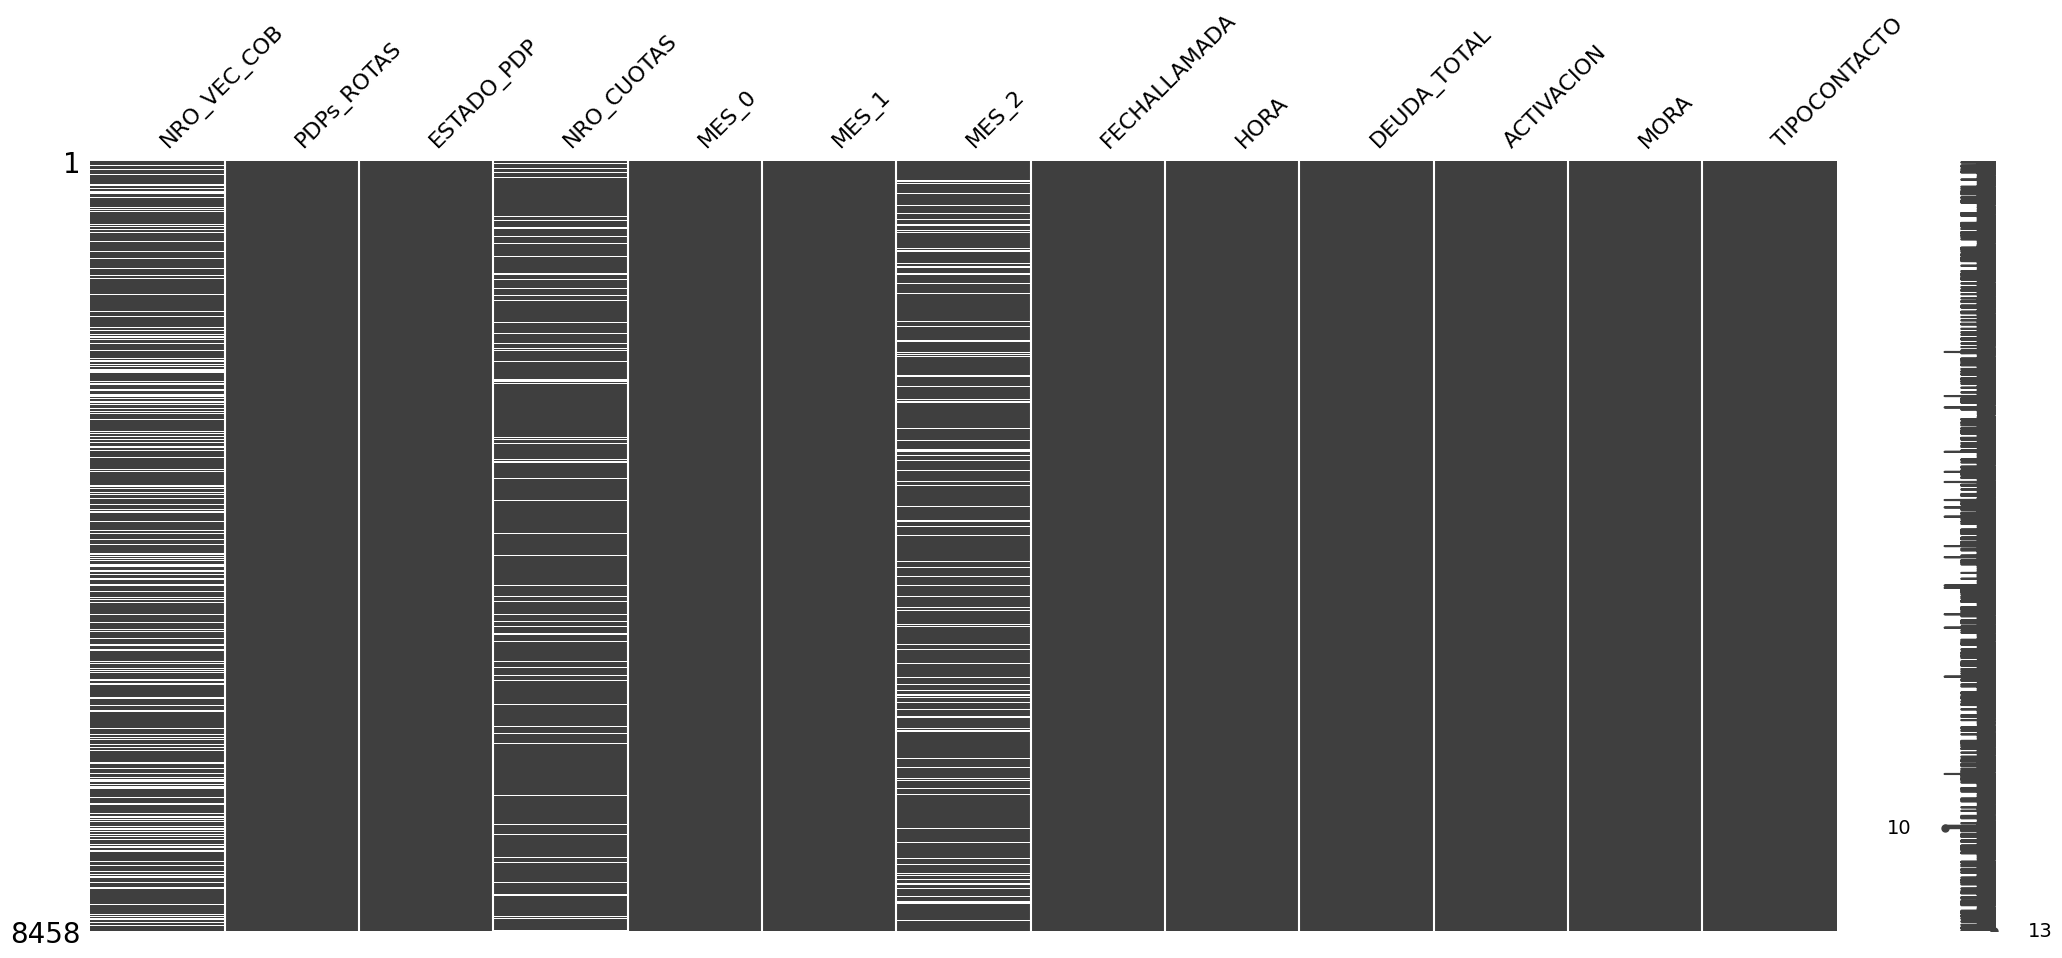

In [265]:
msno.matrix(df)

<Axes: >

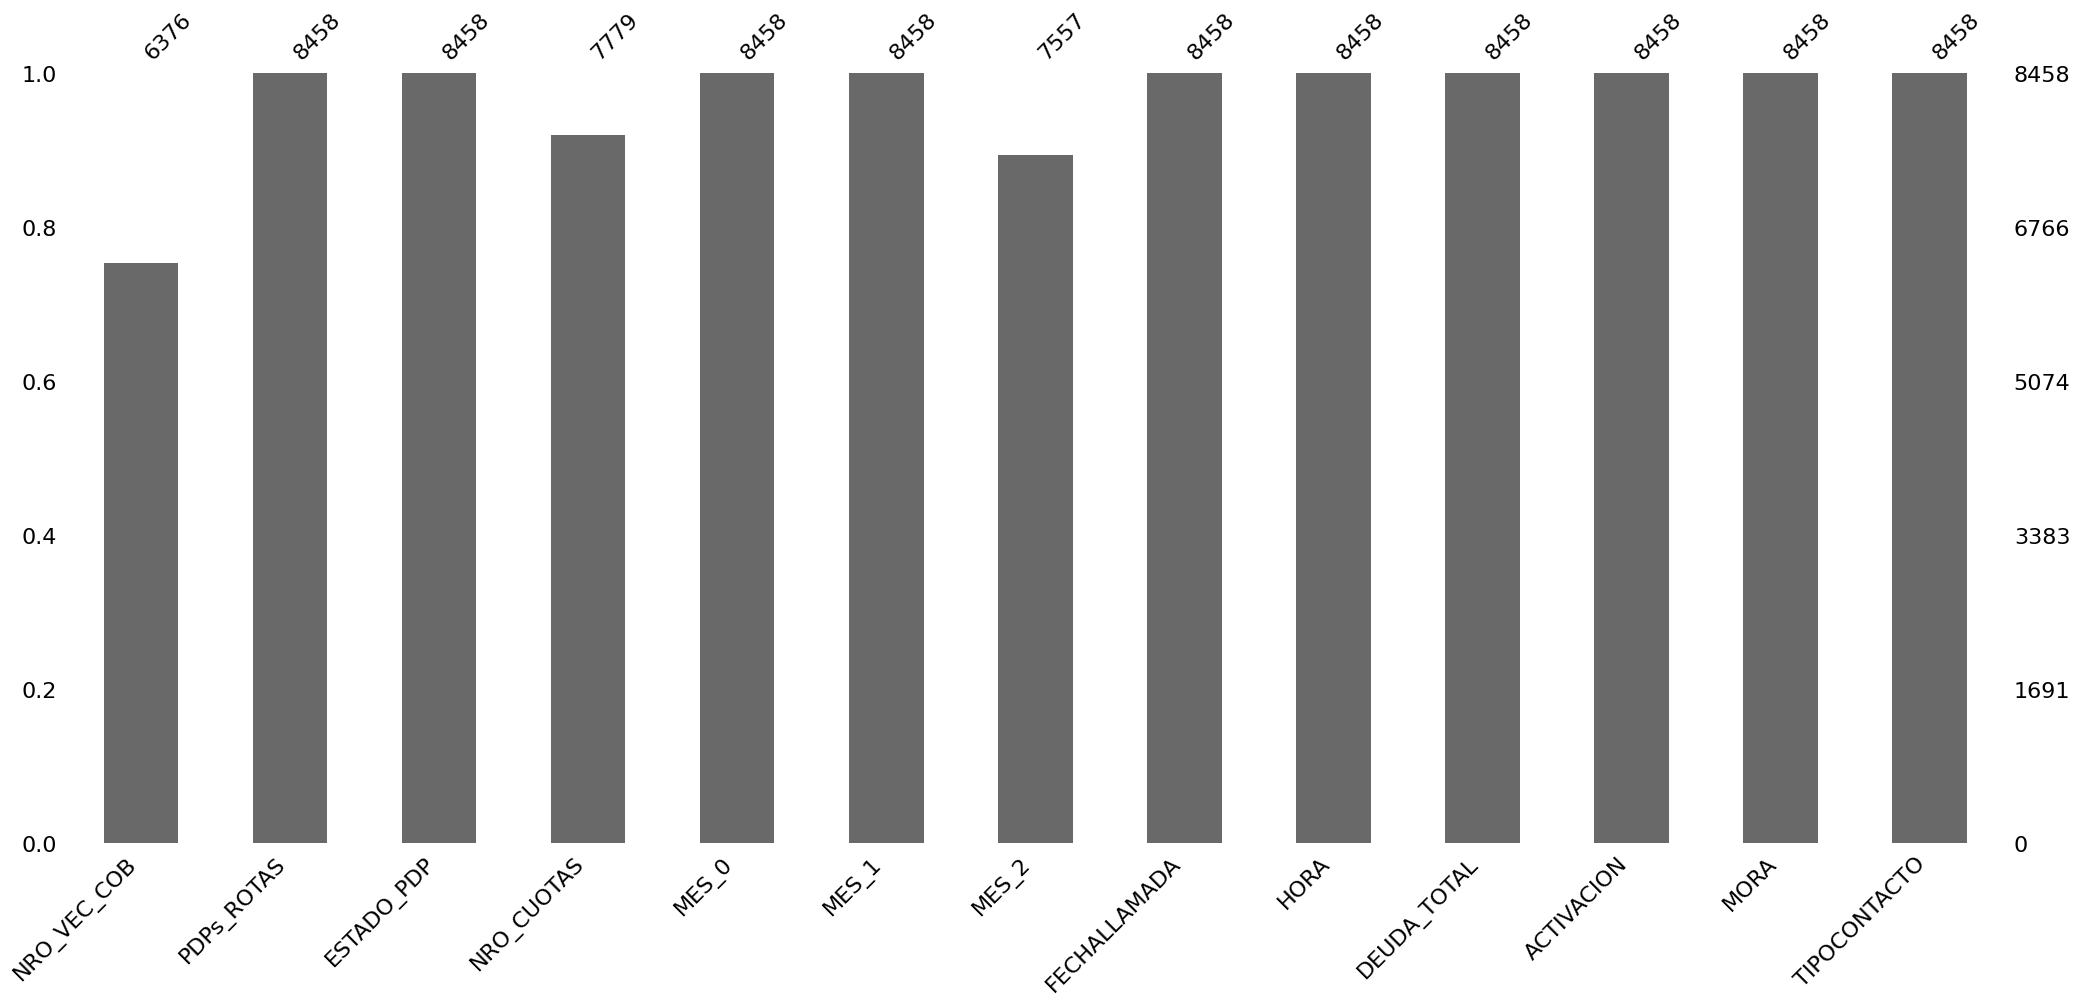

In [266]:
msno.bar(df)

<Axes: >

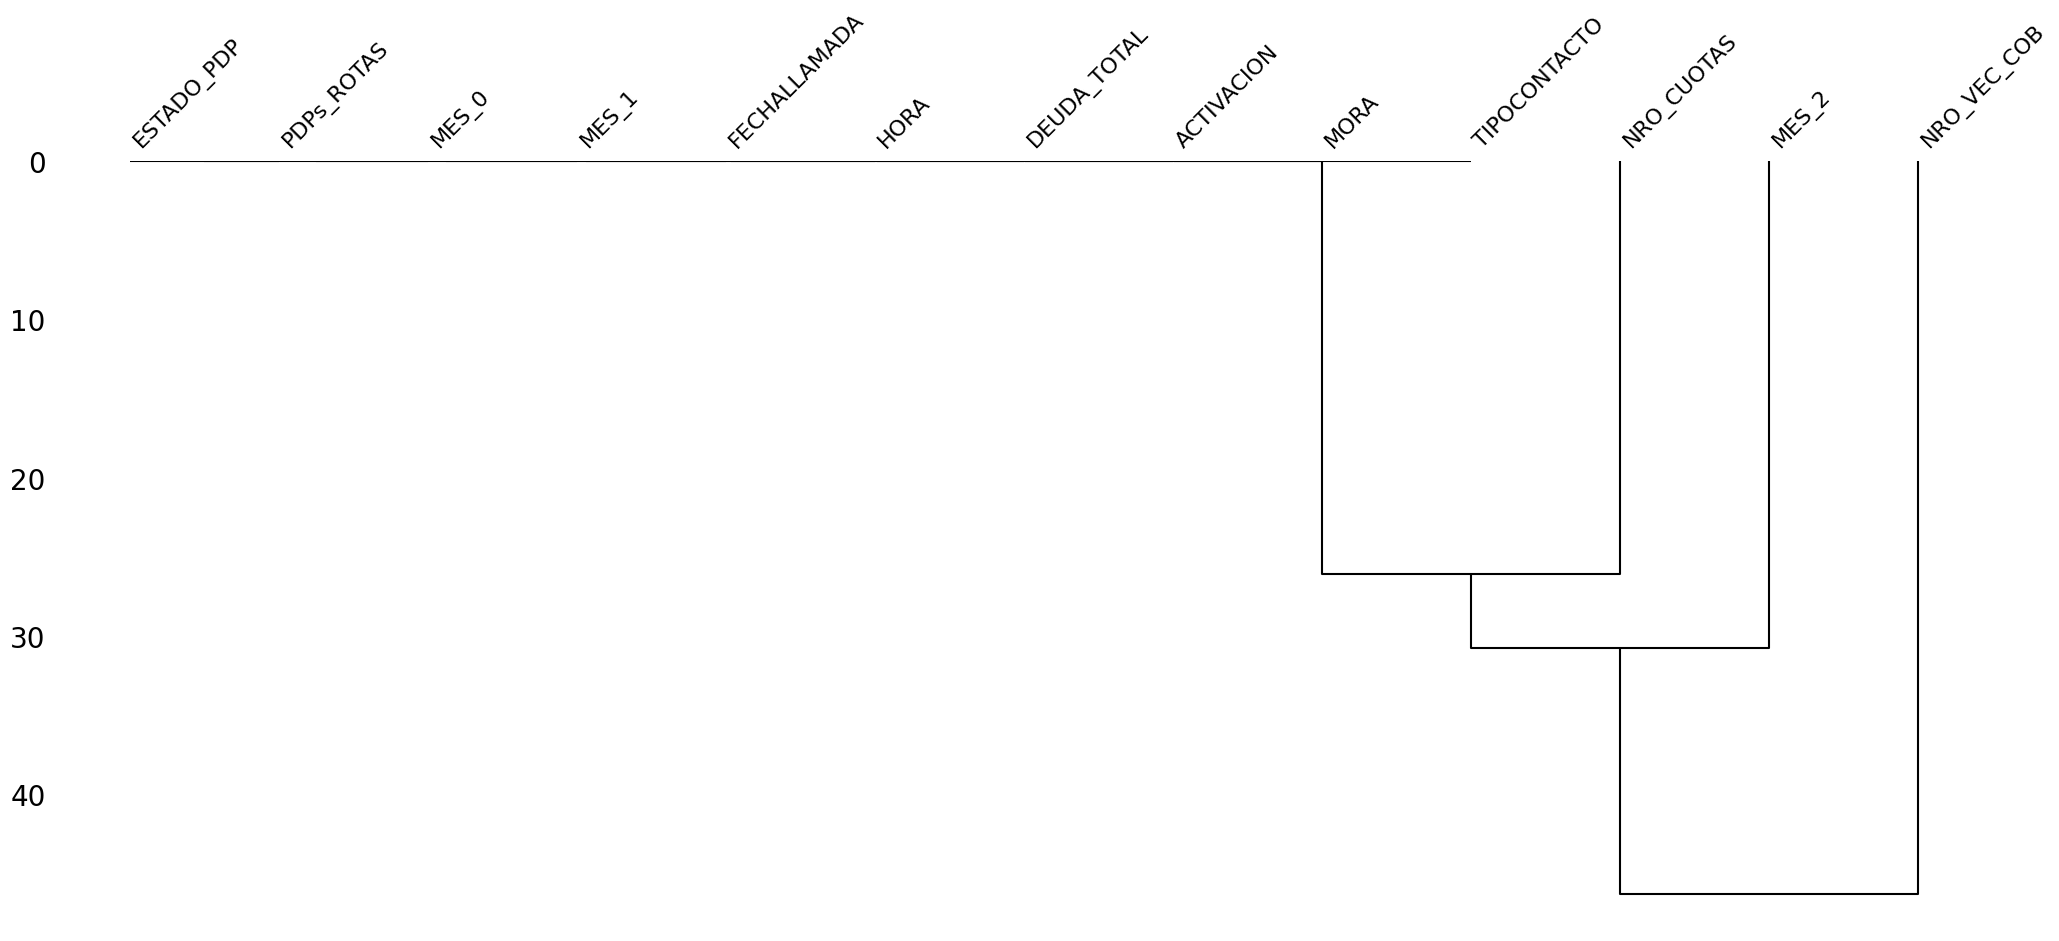

In [267]:
msno.dendrogram(df)

## **Tratamiento de Nulos y variables categoricas y numericas**

In [268]:
#categoria
df_cat = df.select_dtypes(include=["object","datetime"])
#numerica
df_num = df.select_dtypes("number")

In [269]:
#aplicamos imputacion simple de los mas frecuentes a las variables categoricas nulas
from sklearn.impute import SimpleImputer

In [270]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(df_cat)
df_cat_imputed = pd.DataFrame(imputer_cat.transform(df_cat), columns = df_cat.columns)
df_cat_imputed.isnull().sum()

NRO_VEC_COB     0
PDPs_ROTAS      0
NRO_CUOTAS      0
FECHALLAMADA    0
TIPOCONTACTO    0
dtype: int64

In [271]:
df.sample(10)

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ACTIVACION,MORA,TIPOCONTACTO
4313,NaN,0,0,"<24, 48]",258.47,258.68,258.61,2014-03-07,10.0,3956.99,2012.0,1.0,CNE
4333,<=10,0,0,NaN,507.13,507.13,506.44,2014-03-31,12.0,13608.20,2013.0,1.0,CNE
7590,NaN,>0,0,>48,875.30,1171.20,0.00,2014-04-29,11.0,5590.04,2013.0,0.0,CNE
2814,<=10,0,0,"<24, 48]",150.21,0.00,0.00,2014-03-04,10.0,1134.92,2011.0,1.0,COEF
5795,>10,0,0,"<24, 48]",346.93,0.00,0.00,2014-04-30,9.0,5981.04,2011.0,1.0,CNE
3327,NaN,0,0,>48,1914.74,1599.98,0.00,2014-03-18,19.0,65399.60,2013.0,1.0,CNE
7934,NaN,0,0,"<24, 48]",423.48,0.00,166.35,2014-04-02,20.0,872.25,2011.0,0.0,CNE
1949,<=10,0,0,<=24,151.77,0.00,0.00,2014-02-07,10.0,2616.09,2014.0,1.0,CNE
650,<=10,0,0,"<24, 48]",567.21,0.00,565.94,2014-02-26,12.0,17191.30,2013.0,1.0,CNE
6132,<=10,0,0,>48,1541.65,0.00,0.00,2014-04-22,8.0,64993.90,2012.0,1.0,CNE


In [272]:
from sklearn.impute import KNNImputer

In [273]:
knn = KNNImputer(n_neighbors=5)
df_num_knn = pd.DataFrame(data=knn.fit_transform(df_num),columns=df_num.columns)
df_num_knn.isnull().sum()

ESTADO_PDP     0
MES_0          0
MES_1          0
MES_2          0
HORA           0
DEUDA_TOTAL    0
ACTIVACION     0
MORA           0
dtype: int64

In [274]:
#juntar los datos categoricos y numericos
df2=pd.concat([df_num_knn,df_cat_imputed],axis=1)
df2.head()

,ESTADO_PDP,MES_0,MES_1,MES_2,HORA,DEUDA_TOTAL,ACTIVACION,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,FECHALLAMADA,TIPOCONTACTO
0,0.0,244.86,0.00,245.26,15.0,3816.34,2012.0,1.0,<=10,0,"<24, 48]",2014-02-03,COEF
1,0.0,610.58,612.69,611.54,9.0,13620.50,2012.0,1.0,<=10,0,>48,2014-02-18,COEF
2,0.0,2138.73,0.00,0.00,16.0,18968.50,2013.0,0.0,<=10,>0,"<24, 48]",2014-02-05,CNE
3,0.0,323.07,46.85,74.26,19.0,2459.84,2012.0,0.0,>10,0,"<24, 48]",2014-02-24,CNE
4,0.0,920.54,0.00,0.00,14.0,6591.76,2013.0,0.0,<=10,0,"<24, 48]",2014-02-12,CNE


In [275]:
df2.isnull().sum()

ESTADO_PDP      0
MES_0           0
MES_1           0
MES_2           0
HORA            0
DEUDA_TOTAL     0
ACTIVACION      0
MORA            0
NRO_VEC_COB     0
PDPs_ROTAS      0
NRO_CUOTAS      0
FECHALLAMADA    0
TIPOCONTACTO    0
dtype: int64

In [276]:
df2['Periodo_dia']=pd.cut(df2['HORA'],bins=[6,12,18,24],labels=['mañana','tarde','noche'])
df2=df2.drop(['HORA'],axis=1)

In [277]:
df2.head()

,ESTADO_PDP,MES_0,MES_1,MES_2,DEUDA_TOTAL,ACTIVACION,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,FECHALLAMADA,TIPOCONTACTO,Periodo_dia
0,0.0,244.86,0.00,245.26,3816.34,2012.0,1.0,<=10,0,"<24, 48]",2014-02-03,COEF,tarde
1,0.0,610.58,612.69,611.54,13620.50,2012.0,1.0,<=10,0,>48,2014-02-18,COEF,mañana
2,0.0,2138.73,0.00,0.00,18968.50,2013.0,0.0,<=10,>0,"<24, 48]",2014-02-05,CNE,tarde
3,0.0,323.07,46.85,74.26,2459.84,2012.0,0.0,>10,0,"<24, 48]",2014-02-24,CNE,noche
4,0.0,920.54,0.00,0.00,6591.76,2013.0,0.0,<=10,0,"<24, 48]",2014-02-12,CNE,tarde


In [278]:
df2['DIA_SEMANA']=df2['FECHALLAMADA'].dt.day_name()
df2=df2.drop(['FECHALLAMADA'],axis=1)

In [279]:
df2.head()

,ESTADO_PDP,MES_0,MES_1,MES_2,DEUDA_TOTAL,ACTIVACION,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,TIPOCONTACTO,Periodo_dia,DIA_SEMANA
0,0.0,244.86,0.00,245.26,3816.34,2012.0,1.0,<=10,0,"<24, 48]",COEF,tarde,Monday
1,0.0,610.58,612.69,611.54,13620.50,2012.0,1.0,<=10,0,>48,COEF,mañana,Tuesday
2,0.0,2138.73,0.00,0.00,18968.50,2013.0,0.0,<=10,>0,"<24, 48]",CNE,tarde,Wednesday
3,0.0,323.07,46.85,74.26,2459.84,2012.0,0.0,>10,0,"<24, 48]",CNE,noche,Monday
4,0.0,920.54,0.00,0.00,6591.76,2013.0,0.0,<=10,0,"<24, 48]",CNE,tarde,Wednesday


In [280]:
df2.isnull().sum()

ESTADO_PDP      0
MES_0           0
MES_1           0
MES_2           0
DEUDA_TOTAL     0
ACTIVACION      0
MORA            0
NRO_VEC_COB     0
PDPs_ROTAS      0
NRO_CUOTAS      0
TIPOCONTACTO    0
Periodo_dia     0
DIA_SEMANA      0
dtype: int64

In [281]:
df2['ANTIGUEDAD']=2015-df2['ACTIVACION']
df2=df2.drop(['ACTIVACION'],axis=1)

In [282]:
df2.head()

,ESTADO_PDP,MES_0,MES_1,MES_2,DEUDA_TOTAL,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,TIPOCONTACTO,Periodo_dia,DIA_SEMANA,ANTIGUEDAD
0,0.0,244.86,0.00,245.26,3816.34,1.0,<=10,0,"<24, 48]",COEF,tarde,Monday,3.0
1,0.0,610.58,612.69,611.54,13620.50,1.0,<=10,0,>48,COEF,mañana,Tuesday,3.0
2,0.0,2138.73,0.00,0.00,18968.50,0.0,<=10,>0,"<24, 48]",CNE,tarde,Wednesday,2.0
3,0.0,323.07,46.85,74.26,2459.84,0.0,>10,0,"<24, 48]",CNE,noche,Monday,3.0
4,0.0,920.54,0.00,0.00,6591.76,0.0,<=10,0,"<24, 48]",CNE,tarde,Wednesday,2.0


In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ESTADO_PDP    8458 non-null   float64 
 1   MES_0         8458 non-null   float64 
 2   MES_1         8458 non-null   float64 
 3   MES_2         8458 non-null   float64 
 4   DEUDA_TOTAL   8458 non-null   float64 
 5   MORA          8458 non-null   float64 
 6   NRO_VEC_COB   8458 non-null   object  
 7   PDPs_ROTAS    8458 non-null   object  
 8   NRO_CUOTAS    8458 non-null   object  
 9   TIPOCONTACTO  8458 non-null   object  
 10  Periodo_dia   8458 non-null   category
 11  DIA_SEMANA    8458 non-null   object  
 12  ANTIGUEDAD    8458 non-null   float64 
dtypes: category(1), float64(7), object(5)
memory usage: 801.5+ KB


## **Analisis Univariado**

In [284]:
df2['TIPOCONTACTO']=df2['TIPOCONTACTO'].map({'CNE':0,'COEF':1})

In [285]:
df2['TIPOCONTACTO'].value_counts()

0    5974
1    2484
Name: TIPOCONTACTO, dtype: int64

In [286]:
print('Numero de clientes con Contacto No Efectivo: {}'.format((df2['TIPOCONTACTO'] == 0).sum()))
print('Numero de clientes con Contacto Efectivo: {}\n'.format((df2['TIPOCONTACTO'] == 1).sum()))

Numero de clientes con Contacto No Efectivo: 5974
Numero de clientes con Contacto Efectivo: 2484



<Axes: xlabel='TIPOCONTACTO', ylabel='count'>

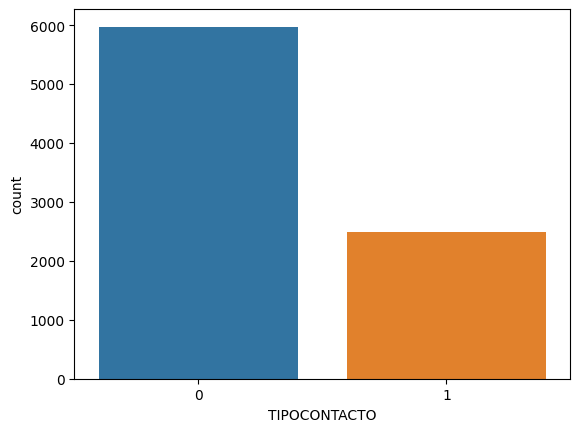

In [287]:
sns.countplot(x='TIPOCONTACTO',data=df2)

In [288]:
#analizar variables categoricas
df2.columns

Index(['ESTADO_PDP', 'MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL', 'MORA',
       'NRO_VEC_COB', 'PDPs_ROTAS', 'NRO_CUOTAS', 'TIPOCONTACTO',
       'Periodo_dia', 'DIA_SEMANA', 'ANTIGUEDAD'],
      dtype='object')

In [289]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ESTADO_PDP    8458 non-null   float64 
 1   MES_0         8458 non-null   float64 
 2   MES_1         8458 non-null   float64 
 3   MES_2         8458 non-null   float64 
 4   DEUDA_TOTAL   8458 non-null   float64 
 5   MORA          8458 non-null   float64 
 6   NRO_VEC_COB   8458 non-null   object  
 7   PDPs_ROTAS    8458 non-null   object  
 8   NRO_CUOTAS    8458 non-null   object  
 9   TIPOCONTACTO  8458 non-null   int64   
 10  Periodo_dia   8458 non-null   category
 11  DIA_SEMANA    8458 non-null   object  
 12  ANTIGUEDAD    8458 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 801.5+ KB


In [290]:
categoricas=['NRO_VEC_COB','PDPs_ROTAS','NRO_CUOTAS','DIA_SEMANA','Periodo_dia','MORA','ESTADO_PDP']

**Analizar la data categorica**

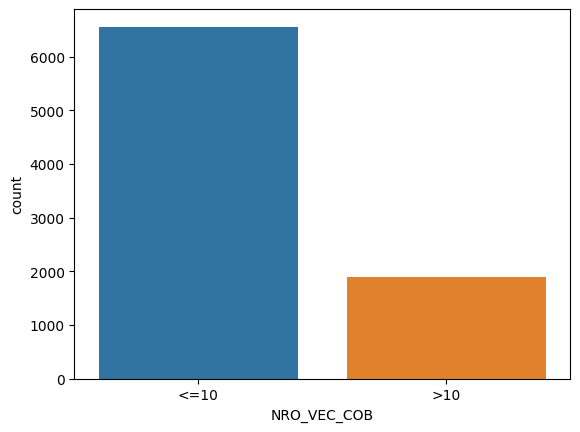

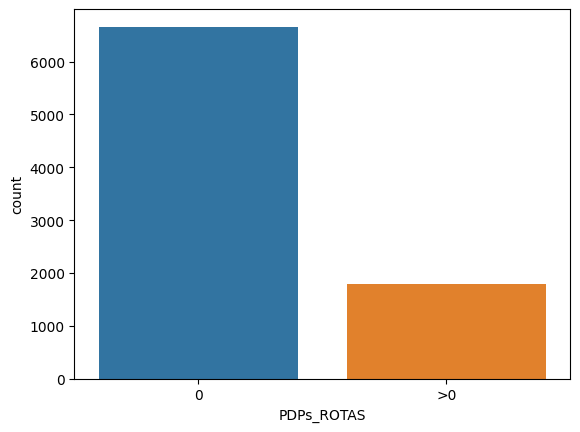

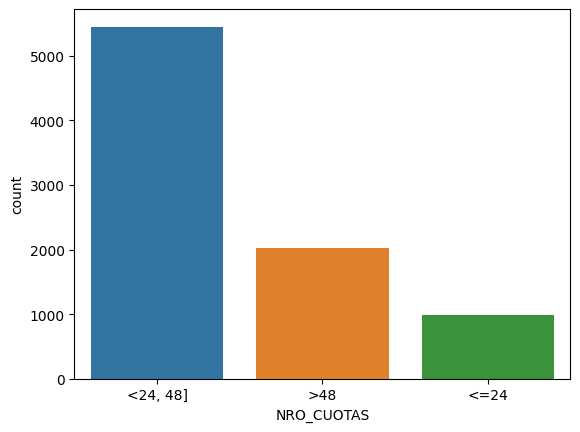

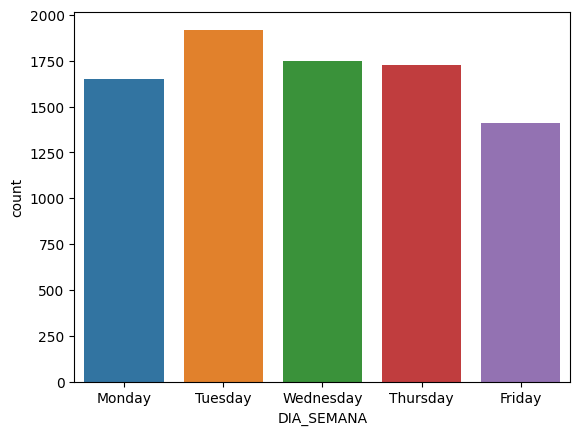

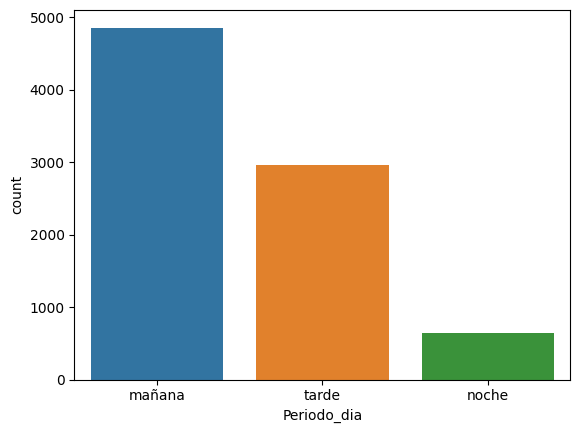

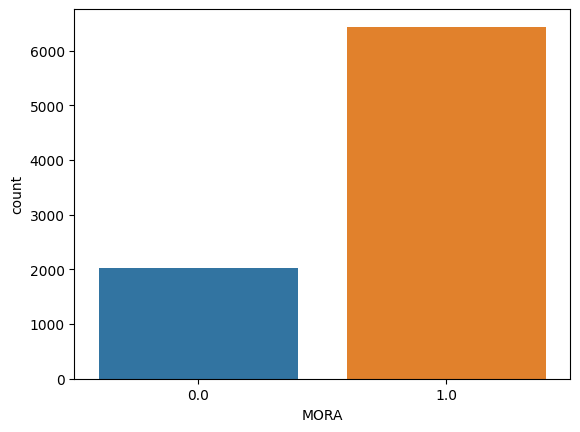

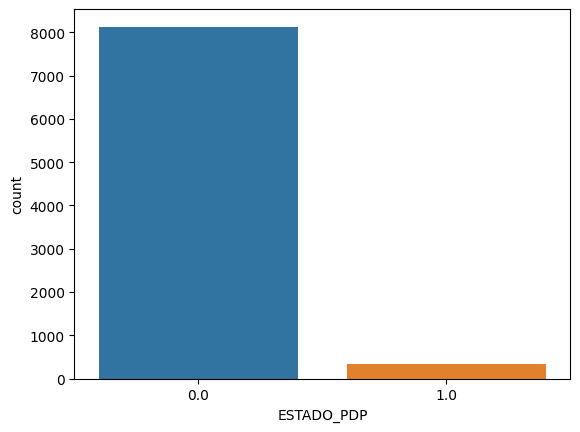

In [291]:
for feature in categoricas:
  sns.countplot(data=df2,x=feature)
  plt.show()

**Analizar la data Numerica**

In [292]:
df2.columns

Index(['ESTADO_PDP', 'MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL', 'MORA',
       'NRO_VEC_COB', 'PDPs_ROTAS', 'NRO_CUOTAS', 'TIPOCONTACTO',
       'Periodo_dia', 'DIA_SEMANA', 'ANTIGUEDAD'],
      dtype='object')

In [293]:
numericas=['MES_0','MES_1','MES_2','DEUDA_TOTAL','ANTIGUEDAD']

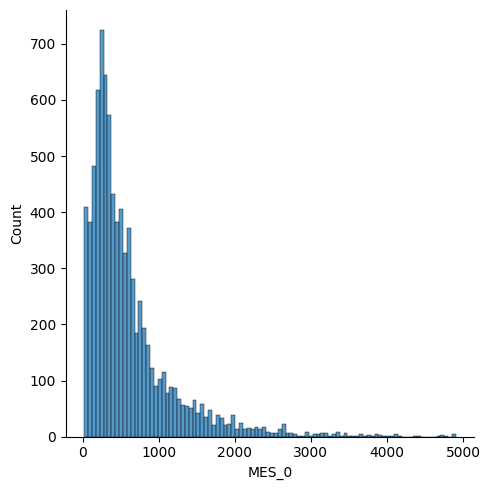

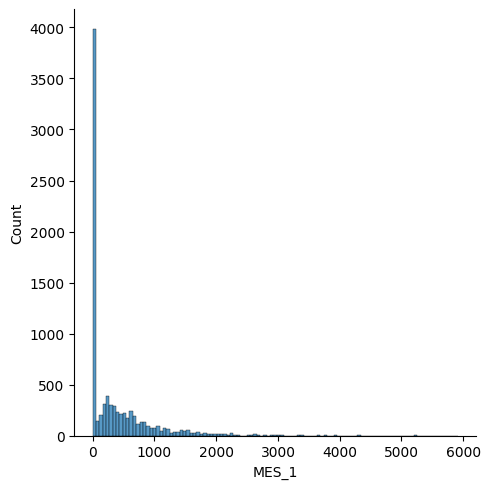

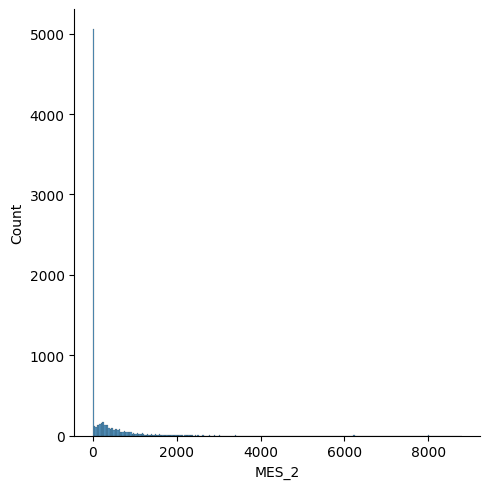

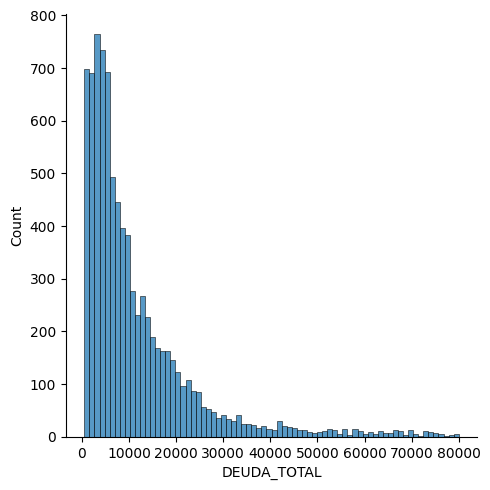

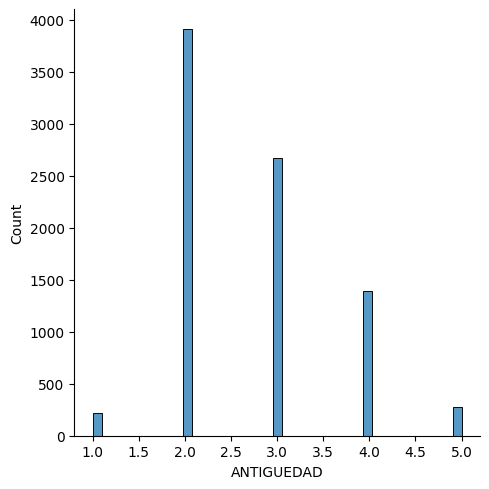

In [294]:
for feature in numericas:
  sns.displot(data=df2,x=feature)
  plt.show()

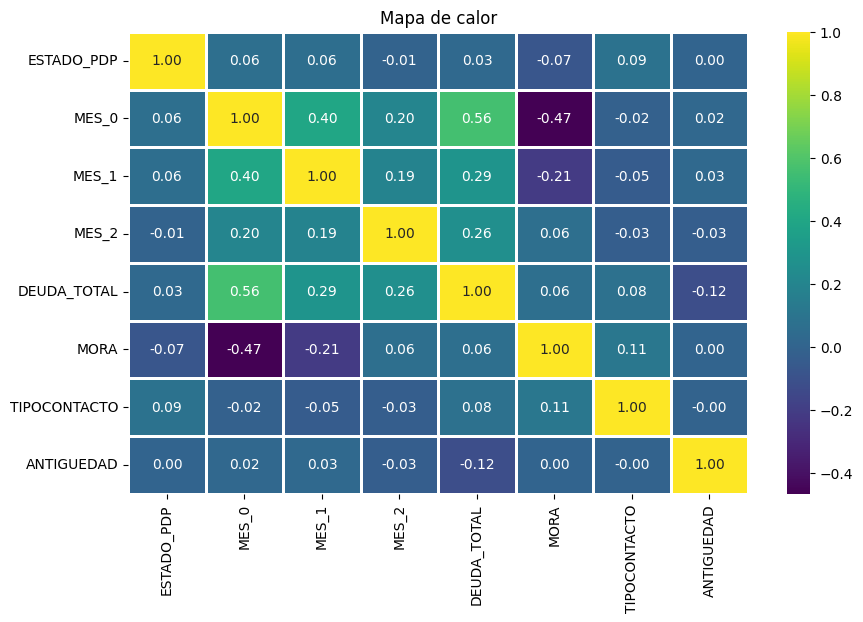

In [295]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,cmap="viridis",fmt='.2f',linewidths=2)
plt.title("Mapa de calor")
plt.show()

**Variables numericas vs el target (TIPOCONTACTO)**

In [296]:
import plotly.express as px

In [297]:
df2.columns

Index(['ESTADO_PDP', 'MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL', 'MORA',
       'NRO_VEC_COB', 'PDPs_ROTAS', 'NRO_CUOTAS', 'TIPOCONTACTO',
       'Periodo_dia', 'DIA_SEMANA', 'ANTIGUEDAD'],
      dtype='object')

In [236]:
for feature in numericas:
  fig=px.box(df2,x='TIPOCONTACTO',y=feature,template='simple_white')
  fig.show()

**Variables Categoricas vs target 'TIPOCONTACTO'**

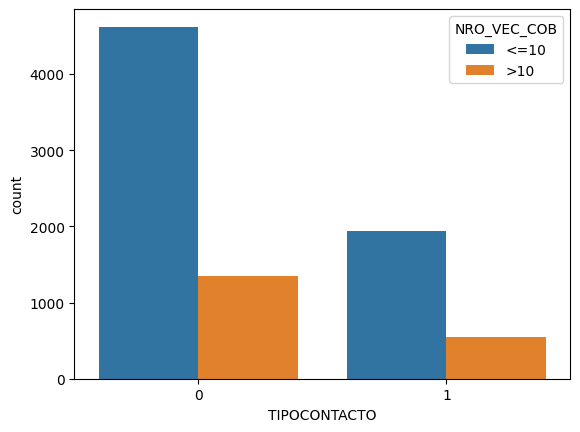

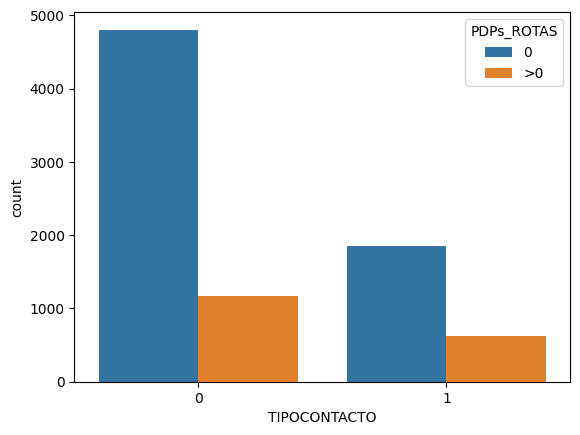

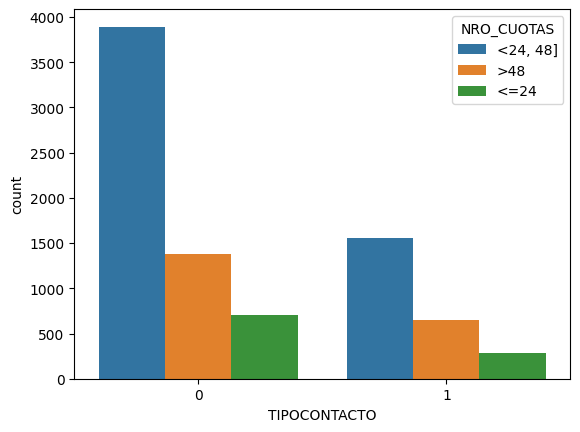

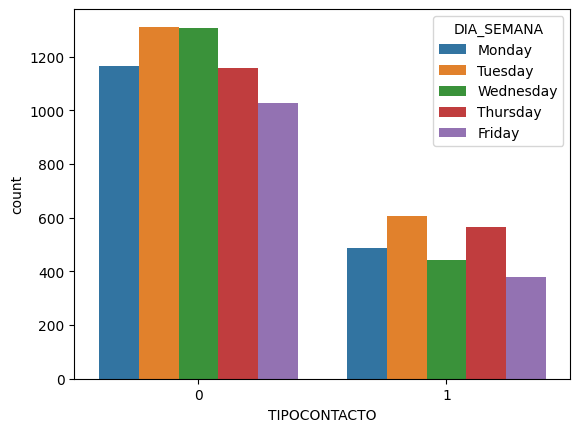

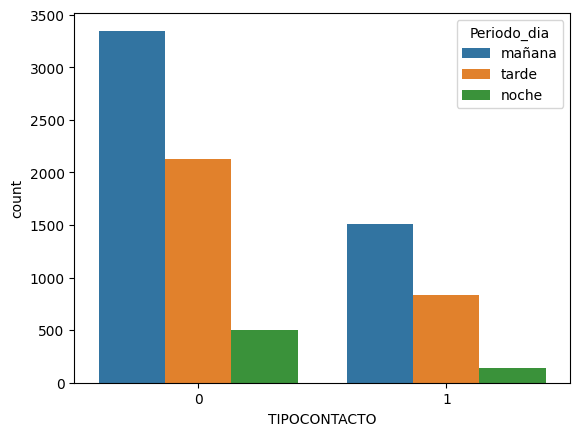

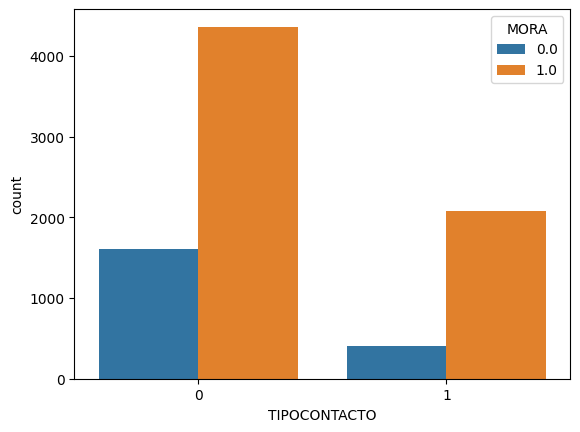

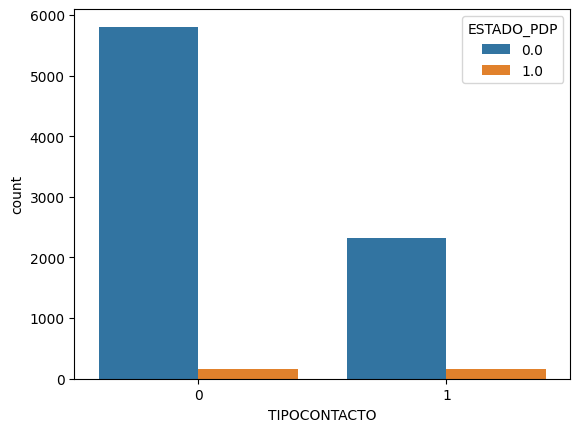

In [298]:
for feature in categoricas:
  sns.countplot(x='TIPOCONTACTO',hue=feature,data=df2)
  plt.show()

## **Tratamiento de Outliers**

In [238]:
df2.columns

Index(['ESTADO_PDP', 'MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL', 'MORA',
       'NRO_VEC_COB', 'PDPs_ROTAS', 'NRO_CUOTAS', 'TIPOCONTACTO',
       'Periodo_dia', 'DIA_SEMANA', 'ANTIGUEDAD'],
      dtype='object')

In [299]:
num_cols=['MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL']
df2_num = pd.DataFrame(data=df2[num_cols])
df2_num[num_cols]=df2[num_cols].apply(lambda x: np.log(x+1))
df2=df2.drop(num_cols,axis=1)

In [302]:
df2_num.isnull().sum()

MES_0          0
MES_1          0
MES_2          0
DEUDA_TOTAL    0
dtype: int64

In [303]:
df2.head()

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,TIPOCONTACTO,Periodo_dia,DIA_SEMANA,ANTIGUEDAD
0,0.0,1.0,<=10,0,"<24, 48]",1,tarde,Monday,3.0
1,0.0,1.0,<=10,0,>48,1,mañana,Tuesday,3.0
2,0.0,0.0,<=10,>0,"<24, 48]",0,tarde,Wednesday,2.0
3,0.0,0.0,>10,0,"<24, 48]",0,noche,Monday,3.0
4,0.0,0.0,<=10,0,"<24, 48]",0,tarde,Wednesday,2.0


**Tratamiento de variables Numericas**

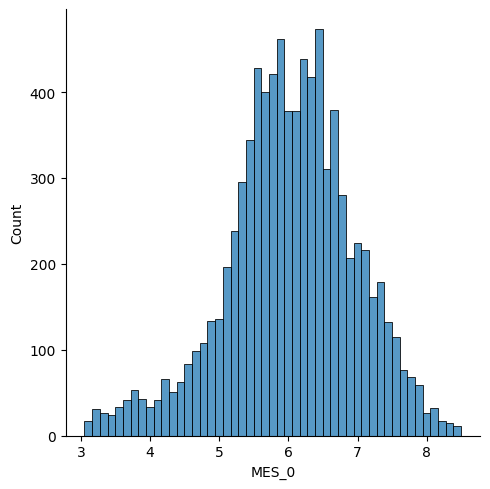

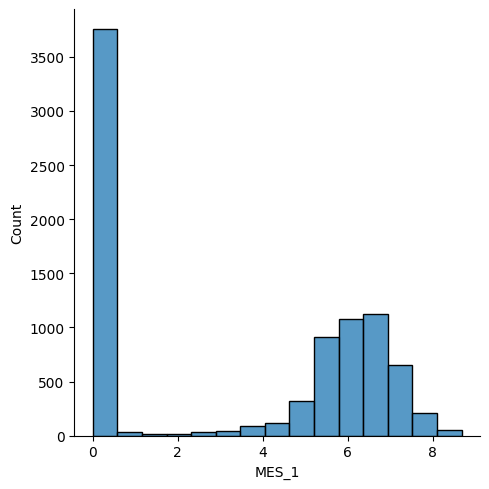

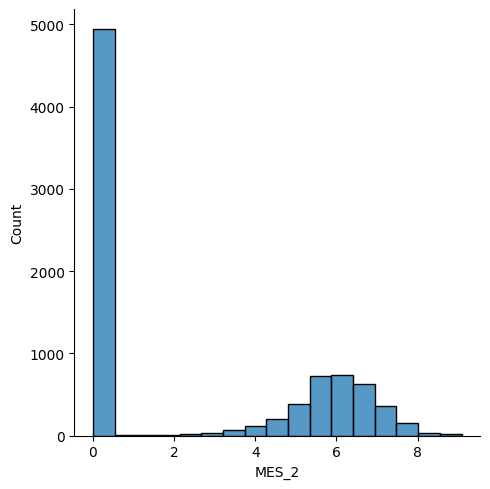

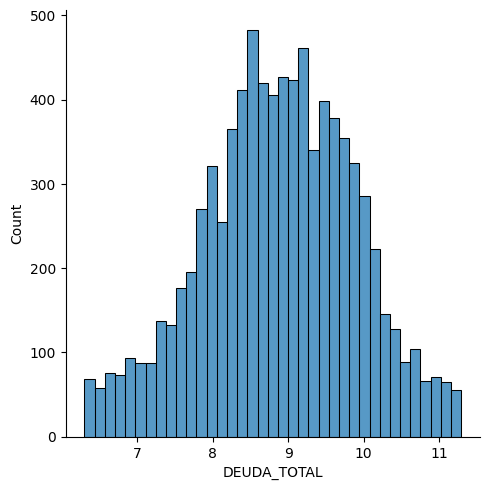

In [304]:
for feature in num_cols:
  sns.displot(data=df2_num,x=feature)
  plt.show()

**Tratamiento de variables categoricas**

In [305]:
df2.sample(8)

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,NRO_CUOTAS,TIPOCONTACTO,Periodo_dia,DIA_SEMANA,ANTIGUEDAD
2499,0.0,1.0,<=10,0,"<24, 48]",1,noche,Thursday,2.0
7621,0.0,1.0,>10,>0,"<24, 48]",1,tarde,Wednesday,3.0
2436,0.0,1.0,>10,0,>48,0,mañana,Friday,3.0
4315,0.0,0.0,<=10,0,>48,0,mañana,Monday,2.0
798,0.0,1.0,>10,0,"<24, 48]",0,tarde,Tuesday,3.0
4750,0.0,1.0,>10,0,>48,0,mañana,Thursday,4.0
8210,0.0,0.0,<=10,0,<=24,1,tarde,Tuesday,2.0
6017,0.0,0.0,<=10,0,<=24,0,tarde,Wednesday,2.0


In [306]:
#label encoding
df2['PDPs_ROTAS']=df2['PDPs_ROTAS'].map({"0":0,">0":1})
df2['NRO_VEC_COB']=df2['NRO_VEC_COB'].map({"<=10":0,">10":1})
df2['NRO_CUOTAS']=df2['NRO_CUOTAS'].map({"<=24":0,"<24, 48]":1,">48":2})

In [307]:
#ONE HOT ENCODING
cat_cols=['NRO_CUOTAS',"DIA_SEMANA",'Periodo_dia']
df2_cat = pd.get_dummies(data=df2[cat_cols], columns=cat_cols)
df2=df2.drop(cat_cols,axis=1)

In [308]:
df2_cat.head()

,NRO_CUOTAS_0,NRO_CUOTAS_1,NRO_CUOTAS_2,DIA_SEMANA_Friday,DIA_SEMANA_Monday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,Periodo_dia_mañana,Periodo_dia_tarde,Periodo_dia_noche
0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,1,0


In [309]:
df2_cat.isnull().sum()

NRO_CUOTAS_0            0
NRO_CUOTAS_1            0
NRO_CUOTAS_2            0
DIA_SEMANA_Friday       0
DIA_SEMANA_Monday       0
DIA_SEMANA_Thursday     0
DIA_SEMANA_Tuesday      0
DIA_SEMANA_Wednesday    0
Periodo_dia_mañana      0
Periodo_dia_tarde       0
Periodo_dia_noche       0
dtype: int64

In [310]:
df2.head()

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,TIPOCONTACTO,ANTIGUEDAD
0,0.0,1.0,0,0,1,3.0
1,0.0,1.0,0,0,1,3.0
2,0.0,0.0,0,1,0,2.0
3,0.0,0.0,1,0,0,3.0
4,0.0,0.0,0,0,0,2.0


In [311]:
#concatenamos la tres tablas
df3=pd.concat([df2,df2_num,df2_cat],axis=1)
df3.sample(10)

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,TIPOCONTACTO,ANTIGUEDAD,MES_0,MES_1,MES_2,DEUDA_TOTAL,...,NRO_CUOTAS_1,NRO_CUOTAS_2,DIA_SEMANA_Friday,DIA_SEMANA_Monday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,Periodo_dia_mañana,Periodo_dia_tarde,Periodo_dia_noche
1491,0.0,0.0,0,1,0,2.0,5.987833,6.673892,6.673892,8.584807,...,0,0,0,0,0,1,0,1,0,0
8315,0.0,1.0,0,0,0,2.0,5.529389,0.000000,6.636904,7.637123,...,0,0,0,0,0,1,0,0,1,0
8249,0.0,1.0,1,0,0,2.0,6.292069,0.000000,6.306056,9.659561,...,1,0,0,1,0,0,0,1,0,0
4195,0.0,1.0,0,0,1,2.0,5.955526,0.000000,0.000000,9.958927,...,1,0,0,0,0,0,1,0,1,0
1259,0.0,1.0,0,0,0,2.0,5.794780,0.000000,6.941403,8.223195,...,0,0,0,0,1,0,0,1,0,0
4857,0.0,1.0,0,1,0,2.0,3.639427,5.663308,0.000000,7.924141,...,1,0,0,0,1,0,0,0,1,0
4874,0.0,0.0,0,0,0,2.0,6.924701,7.332016,0.000000,9.595569,...,1,0,0,0,0,1,0,0,1,0
4323,0.0,0.0,0,1,0,2.0,6.070114,0.000000,4.926645,7.682183,...,0,0,1,0,0,0,0,0,1,0
4910,0.0,1.0,0,0,0,2.0,5.498888,0.000000,0.000000,7.375976,...,0,0,0,1,0,0,0,1,0,0
7667,0.0,1.0,0,0,0,2.0,5.772749,0.000000,0.000000,8.634622,...,1,0,0,0,0,1,0,1,0,0


In [312]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ESTADO_PDP            8458 non-null   float64
 1   MORA                  8458 non-null   float64
 2   NRO_VEC_COB           8458 non-null   int64  
 3   PDPs_ROTAS            8458 non-null   int64  
 4   TIPOCONTACTO          8458 non-null   int64  
 5   ANTIGUEDAD            8458 non-null   float64
 6   MES_0                 8458 non-null   float64
 7   MES_1                 8458 non-null   float64
 8   MES_2                 8458 non-null   float64
 9   DEUDA_TOTAL           8458 non-null   float64
 10  NRO_CUOTAS_0          8458 non-null   uint8  
 11  NRO_CUOTAS_1          8458 non-null   uint8  
 12  NRO_CUOTAS_2          8458 non-null   uint8  
 13  DIA_SEMANA_Friday     8458 non-null   uint8  
 14  DIA_SEMANA_Monday     8458 non-null   uint8  
 15  DIA_SEMANA_Thursday  

In [313]:
df3 = df3.astype({"ESTADO_PDP":"int64","MORA":"int64","ANTIGUEDAD":"int64"})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ESTADO_PDP            8458 non-null   int64  
 1   MORA                  8458 non-null   int64  
 2   NRO_VEC_COB           8458 non-null   int64  
 3   PDPs_ROTAS            8458 non-null   int64  
 4   TIPOCONTACTO          8458 non-null   int64  
 5   ANTIGUEDAD            8458 non-null   int64  
 6   MES_0                 8458 non-null   float64
 7   MES_1                 8458 non-null   float64
 8   MES_2                 8458 non-null   float64
 9   DEUDA_TOTAL           8458 non-null   float64
 10  NRO_CUOTAS_0          8458 non-null   uint8  
 11  NRO_CUOTAS_1          8458 non-null   uint8  
 12  NRO_CUOTAS_2          8458 non-null   uint8  
 13  DIA_SEMANA_Friday     8458 non-null   uint8  
 14  DIA_SEMANA_Monday     8458 non-null   uint8  
 15  DIA_SEMANA_Thursday  

## **Escalamiento**

In [314]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
df3.head()

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,TIPOCONTACTO,ANTIGUEDAD,MES_0,MES_1,MES_2,DEUDA_TOTAL,...,NRO_CUOTAS_1,NRO_CUOTAS_2,DIA_SEMANA_Friday,DIA_SEMANA_Monday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,Periodo_dia_mañana,Periodo_dia_tarde,Periodo_dia_noche
0,0,1,0,0,1,3,5.504762,0.000000,5.506388,8.247309,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,3,6.416046,6.419490,6.417614,9.519405,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,0,2,7.668435,0.000000,0.000000,9.850588,...,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,3,5.780960,3.868071,4.320949,7.808258,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,2,6.826046,0.000000,0.000000,8.793727,...,1,0,0,0,0,0,1,0,1,0


In [316]:
#tratamiento de los valores numericos a escalares
escalar_cols=['ANTIGUEDAD','MES_0','MES_1','MES_2','DEUDA_TOTAL']
scaler=MinMaxScaler()
df3_escalar=pd.DataFrame(data=scaler.fit_transform(df3[escalar_cols]),columns=escalar_cols)
df3=df3.drop(escalar_cols,axis=1)
df3=pd.concat([df3,df3_escalar],axis=1)
df3.head()

,ESTADO_PDP,MORA,NRO_VEC_COB,PDPs_ROTAS,TIPOCONTACTO,NRO_CUOTAS_0,NRO_CUOTAS_1,NRO_CUOTAS_2,DIA_SEMANA_Friday,DIA_SEMANA_Monday,...,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,Periodo_dia_mañana,Periodo_dia_tarde,Periodo_dia_noche,ANTIGUEDAD,MES_0,MES_1,MES_2,DEUDA_TOTAL
0,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0.50,0.450381,0.000000,0.606317,0.389710
1,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0.50,0.617688,0.739195,0.706653,0.644895
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0.25,0.847620,0.000000,0.000000,0.711332
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0.50,0.501089,0.445403,0.475786,0.301635
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0.25,0.692962,0.000000,0.000000,0.499323


In [317]:
df3.isnull().sum()

ESTADO_PDP              0
MORA                    0
NRO_VEC_COB             0
PDPs_ROTAS              0
TIPOCONTACTO            0
NRO_CUOTAS_0            0
NRO_CUOTAS_1            0
NRO_CUOTAS_2            0
DIA_SEMANA_Friday       0
DIA_SEMANA_Monday       0
DIA_SEMANA_Thursday     0
DIA_SEMANA_Tuesday      0
DIA_SEMANA_Wednesday    0
Periodo_dia_mañana      0
Periodo_dia_tarde       0
Periodo_dia_noche       0
ANTIGUEDAD              0
MES_0                   0
MES_1                   0
MES_2                   0
DEUDA_TOTAL             0
dtype: int64

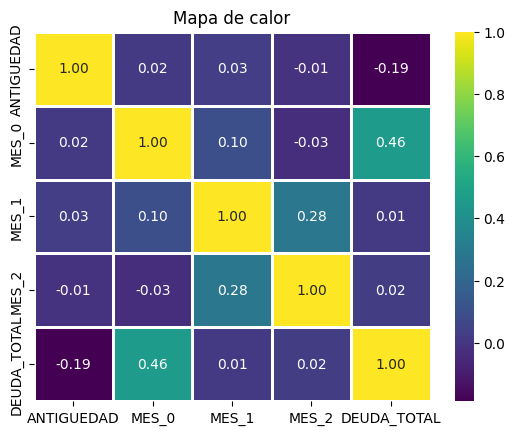

In [318]:
sns.heatmap(data=df3_escalar.corr(),annot=True,cmap="viridis",fmt='.2f',linewidths=2)
plt.title("Mapa de calor")
plt.show()

## **Modelo Predictivo**

In [319]:
df3.columns

Index(['ESTADO_PDP', 'MORA', 'NRO_VEC_COB', 'PDPs_ROTAS', 'TIPOCONTACTO',
       'NRO_CUOTAS_0', 'NRO_CUOTAS_1', 'NRO_CUOTAS_2', 'DIA_SEMANA_Friday',
       'DIA_SEMANA_Monday', 'DIA_SEMANA_Thursday', 'DIA_SEMANA_Tuesday',
       'DIA_SEMANA_Wednesday', 'Periodo_dia_mañana', 'Periodo_dia_tarde',
       'Periodo_dia_noche', 'ANTIGUEDAD', 'MES_0', 'MES_1', 'MES_2',
       'DEUDA_TOTAL'],
      dtype='object')

In [320]:
X=df3.drop('TIPOCONTACTO',axis=1) #variable x
y=df3['TIPOCONTACTO'] #variable y

In [321]:
from sklearn import model_selection

In [322]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,stratify=y,random_state=100)
print('Data entrenamiento: {} x {}'.format(X_train.shape[0],X_train.shape[1]))
print('Data de prueba: {} x {}'.format(X_test.shape[0],X_test.shape[1]))

Data entrenamiento: 6343 x 20
Data de prueba: 2115 x 20


In [323]:
X_train.isnull().sum()

ESTADO_PDP              0
MORA                    0
NRO_VEC_COB             0
PDPs_ROTAS              0
NRO_CUOTAS_0            0
NRO_CUOTAS_1            0
NRO_CUOTAS_2            0
DIA_SEMANA_Friday       0
DIA_SEMANA_Monday       0
DIA_SEMANA_Thursday     0
DIA_SEMANA_Tuesday      0
DIA_SEMANA_Wednesday    0
Periodo_dia_mañana      0
Periodo_dia_tarde       0
Periodo_dia_noche       0
ANTIGUEDAD              0
MES_0                   0
MES_1                   0
MES_2                   0
DEUDA_TOTAL             0
dtype: int64

**Modelos predictivos**

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [325]:
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_dt = DecisionTreeClassifier()
model_ada = AdaBoostClassifier() 

In [335]:
#cross validation
models = [model_lr, model_knn, model_rf, model_xgb, model_dt, model_ada]
accuracies = []
for model in models:
  cv_scores = model_selection.cross_val_score(model, X_train, y_train, cv=10)
  accuracies.append(cv_scores.mean().round(4))

In [336]:
print('''
Model CROSS Validation Accuracy (PROMEDIO)
Logistic Regression: {}
K Nearest Neighbors: {}
Random Forest:       {}
XGBoost:             {}
Decision Tree:       {}
AdaBoost:            {}
'''.format(*accuracies))


Model CROSS Validation Accuracy (PROMEDIO)
Logistic Regression: 0.7041
K Nearest Neighbors: 0.661
Random Forest:       0.6971
XGBoost:             0.6864
Decision Tree:       0.6301
AdaBoost:            0.7068



##  **Modelos con hiperparametros**

In [ ]:
#modelos con hiperparametros

In [337]:
from sklearn.model_selection import GridSearchCV

In [339]:
#definir la clase para los modelos y parametros respectivo a cada modelo
def validate_and_test(model, params, model_name):
    print('Model: {}\n'.format(model_name))

    #entrenamiento de los modelos
    gscv = GridSearchCV(model, params, cv=10)
    gscv.fit(X_train, y_train)
    print('Best parameter set: {}\nTrain accuracy: {}'\
        .format(gscv.best_params_, gscv.best_score_))
    
    # Model Testing tambien se valida para ver el overfit en la data test vs train
    best_model = gscv.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print('Test accuracy: {}'.format(test_accuracy))

    return best_model

**Regression Logistica**

In [344]:
model_lr = LogisticRegression(solver='liblinear')
params_lr = {
    'penalty': ('l1', 'l2'), 
    'C': (0.01, 0.05, 0.1, 0.2, 0.5, 1) 
}
best_model_lr = validate_and_test(model_lr, params_lr, 'Logistic Regression')

Model: Logistic Regression

Best parameter set: {'C': 0.05, 'penalty': 'l2'}
Train accuracy: 0.7078670607814402
Test accuracy: 0.7040189125295508


In [348]:
# MODELO KNN
model_knn = KNeighborsClassifier()
params_knn = {
    'n_neighbors': range(1, 30, 4),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
}
best_model_knn = validate_and_test(model_knn, params_knn, 'K Nearest Neighbors')

Model: K Nearest Neighbors

Best parameter set: {'algorithm': 'auto', 'n_neighbors': 25}
Train accuracy: 0.7051876599021337
Test accuracy: 0.700709219858156


In [350]:
#RANDOM FOREST
model_rf = RandomForestClassifier()
params_rf = {
    'n_estimators': range(40, 100, 20),
    'max_depth': range(1, 20, 2)
}
best_model_rf = validate_and_test(model_rf, params_rf, 'Random Forest')

Model: Random Forest

Best parameter set: {'max_depth': 9, 'n_estimators': 40}
Train accuracy: 0.7092858739660697
Test accuracy: 0.7044917257683215


In [351]:
#modelo xgbost
model_xgb = XGBClassifier()
params_xgb = {
    'booster': ['gbtree', 'gblinear'],
	'eta': [0.1, 0.5, 1],
    'max_depth': range(3, 11, 3),
	'n_estimators': range(20, 61, 20),
	'subsample': [0.25, 0.5, 1]
}
best_model_xgb = validate_and_test(model_xgb, params_xgb, 'XGBoost')

Model: XGBoost

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[13:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "subsample" }

In [352]:
#DECISION TREE
model_dt = DecisionTreeClassifier()
params_dt = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}
best_model_dt = validate_and_test(model_dt, params_dt, 'Decision Tree')

Model: Decision Tree

Best parameter set: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Train accuracy: 0.7091276484761171
Test accuracy: 0.7054373522458629


In [353]:
#ADA BOOST
model_ada = AdaBoostClassifier()
param_ada = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0, 2.0]}
best_model_ada = validate_and_test(model_ada, param_ada, 'AdaBoost')

Model: AdaBoost

Best parameter set: {'learning_rate': 0.1, 'n_estimators': 50}
Train accuracy: 0.7073938746615662
Test accuracy: 0.7044917257683215


In [362]:
model_names = ['Logistic Regression', 'K Nearest Neighbor', 'Random Forest', 'XGBoost','Decision Tree','AdaBoost']
best_models = [best_model_lr, best_model_knn, best_model_rf, best_model_xgb, best_model_dt, best_model_ada]
test_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

test_results = {
    'Logistic Regression': [],
    'K Nearest Neighbor': [],
    'Random Forest': [],
    'XGBoost': [],
    'Decision Tree': [],
    'AdaBoost': [],
}

In [363]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [364]:
def evaluate(model, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_results[model_name].extend([accuracy, precision, recall, f1])
    print('Model:     {}'.format(model_name))
    print('Accuracy:  {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall:    {}'.format(recall))
    print('F1-Score:  {}'.format(f1))
    print()

In [365]:
for i in range(len(model_names)):
    evaluate(best_models[i], model_names[i])

Model:     Logistic Regression
Accuracy:  0.7040189125295508
Precision: 0.44680851063829785
Recall:    0.033816425120772944
F1-Score:  0.06287425149700598

Model:     K Nearest Neighbor
Accuracy:  0.700709219858156
Precision: 0.45
Recall:    0.08695652173913043
F1-Score:  0.14574898785425103

Model:     Random Forest
Accuracy:  0.7044917257683215
Precision: 0.45652173913043476
Recall:    0.033816425120772944
F1-Score:  0.06296851574212893

Model:     XGBoost
Accuracy:  0.7035460992907802
Precision: 0.44
Recall:    0.03542673107890499
F1-Score:  0.06557377049180327

Model:     Decision Tree
Accuracy:  0.7054373522458629
Precision: 0.4444444444444444
Recall:    0.01288244766505636
F1-Score:  0.025039123630672927

Model:     AdaBoost
Accuracy:  0.7044917257683215
Precision: 0.375
Recall:    0.00966183574879227
F1-Score:  0.018838304552590265

